In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [24]:
df = pd.read_csv('fortune500.csv')
df.columns = ['year', 'rank', 'company','revenue','profit']

non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)
print("Dataset length: ", len(df))

Dataset length:  25131


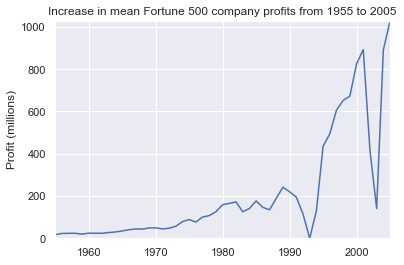

In [28]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

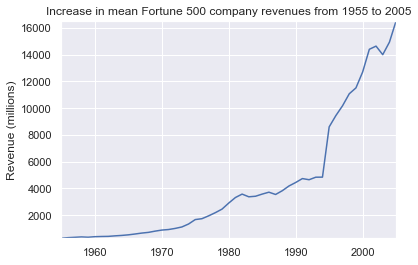

In [29]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')